<a href="https://colab.research.google.com/github/Furank1/ConstruccionDeSoftware/blob/master/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

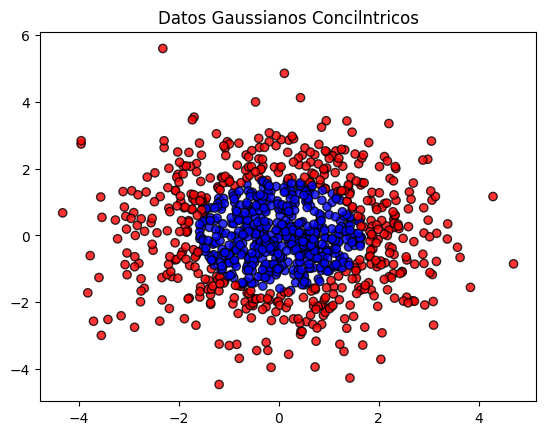

In [3]:
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

# Generar datos Gaussianos concéntricos
X, y = make_gaussian_quantiles(cov=2.0,
                               n_samples=1000,
                               n_features=2,
                               n_classes=2,
                               random_state=1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.8)
plt.title('Datos Gaussianos Concilntricos')
plt.show()

# PASO 2: Manipulación de datos


In [4]:
# Dividir en entrenamiento, validación y prueba
from sklearn.model_selection import train_test_split

# Primero divido entrenamiento+validación vs prueba
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
# Luego divido entrenamiento vs validación
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

print(f"Tamaño Entrenamiento: {X_train.shape[0]}")
print(f"Tamaño Validación: {X_val.shape[0]}")
print(f"Tamaño Prueba: {X_test.shape[0]}")

Tamaño Entrenamiento: 600
Tamaño Validación: 200
Tamaño Prueba: 200


#PASO 3: Exploración de Datos

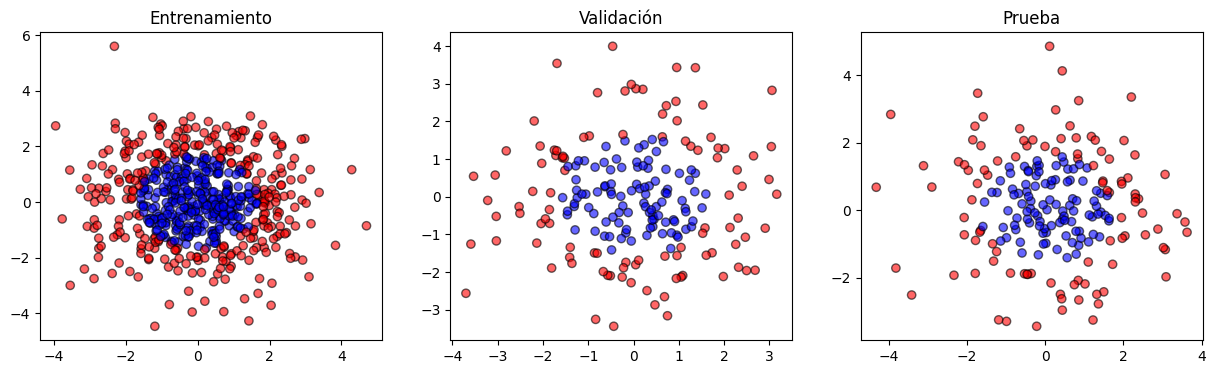

In [5]:
# Graficar los tres conjuntos con colores distintos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sets = [(X_train, y_train, 'Entrenamiento'),
        (X_val, y_val, 'Validación'),
        (X_test, y_test, 'Prueba')]

for ax, (Xi, yi, title) in zip(axes, sets):
    ax.scatter(Xi[:, 0], Xi[:, 1], c=yi, cmap='bwr', edgecolor='k', alpha=0.6)
    ax.set_title(title)

plt.show()

# PASO 4: Modelamiento de Datos (Machine Learning)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Entrenamiento inicial con parámetros por defecto
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred_val = svm.predict(X_val)
print("Reporte Validación - parámetros por defecto")
print(classification_report(y_val, y_pred_val))

Reporte Validación - parámetros por defecto
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       100
           1       1.00      0.96      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



#PASO 5: Interpretación de los Resultados

El kernel Gaussiano (RBF) permite separar datos que no se pueden dividir con una línea recta,porque transforma los datos a un espacio donde sí se ven separables.
Ajustar C y gamma ayuda a encontrar un buen equilibrio:
  - C controla cuánto penalizamos errores: C alto = pocos errores en entrenamiento.
  - gamma controla la "rotundidad" del kernel: gamma alto = fronteras más complejas.
  
Nuestro modelo con C={} y gamma={} logra un buen balance, ni muy simple ni muy complejo.".format(grid.best_params_['C'], grid.best_params_['gamma'])}]}
